In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [35]:
url="https://finance.yahoo.com/most-active?count=25&offset=0" #open link
html = urlopen(url)

In [36]:
soup = BeautifulSoup(html)

In [37]:
data = []
allrows= soup.find_all("tr")
for row in allrows :
    row_list = row.find_all("td")
    dataRow= []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
  
data = data[1:] 

In [38]:
header_list = []
col_headers = soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Symbol', 'Name', 'Price (Intraday)', 'Change', '% Change', 'Volume', 'Avg Vol (3 month)', 'Market Cap', 'PE Ratio (TTM)', '52 Week Range']


In [39]:
df = pd.DataFrame(data)

In [40]:
df.columns = header_list

In [41]:
df.shape

(100, 10)

In [42]:
df2 = df.dropna(how='any')
df.shape

(100, 10)

In [43]:
#Need to change format of Change from string to numeric 
Change_list = df2['% Change'].tolist()
Change_num = []
for i in Change_list:
    num = i.strip("+-%")
    Change_num.append(num)
#pass num back to Change_list
df2['% Change_new'] = Change_num
df2.head(5)
print(df2.head(5))


  Symbol                           Name Price (Intraday)   Change % Change  \
0    BAC    Bank of America Corporation            28.91    +0.46   +1.62%   
1    CHK  Chesapeake Energy Corporation           1.3900  +0.1000   +7.75%   
2    AMD   Advanced Micro Devices, Inc.            29.75    +1.37   +4.83%   
3     GE       General Electric Company             8.80    +0.35   +4.14%   
4    FCX          Freeport-McMoRan Inc.             9.55    +0.64   +7.18%   

    Volume Avg Vol (3 month) Market Cap PE Ratio (TTM) 52 Week Range  \
0  67.678M           56.863M   269.103B          10.29                 
1   67.61M           56.433M     2.716B            N/A                 
2  66.632M           58.796M    32.764B         164.36                 
3  54.975M           66.875M    76.798B            N/A                 
4  45.688M           21.362M    13.856B          14.00                 

  % Change_new  
0         1.62  
1         7.75  
2         4.83  
3         4.14  
4         7.1

In [44]:
#Need to change format of Volume from string to numeric 
Market_Cap_list = df2['Market Cap'].tolist()
Market_Cap_num = []
for i in Market_Cap_list:
    i=str(i)
    if i.endswith('B'):
        num1 = i.strip("B")
        num1 = float(num1)*1000000000
    elif i.endswith('T'):
        num1 = i.strip("T")
        num1 = float(num1)*1000000000000
    Market_Cap_num.append(num1)
#pass num back to Volume_list
df2['Market Cap_new'] = Market_Cap_num
df2.head(5)
#print(df2['Market Cap_new'])

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range,% Change_new,Market Cap_new
0,BAC,Bank of America Corporation,28.91,+0.46,+1.62%,67.678M,56.863M,269.103B,10.29,,1.62,2.691030e+11
1,CHK,Chesapeake Energy Corporation,1.3900,+0.1000,+7.75%,67.61M,56.433M,2.716B,N/A,,7.75,2.716000e+09
2,AMD,"Advanced Micro Devices, Inc.",29.75,+1.37,+4.83%,66.632M,58.796M,32.764B,164.36,,4.83,3.276400e+10
3,GE,General Electric Company,8.80,+0.35,+4.14%,54.975M,66.875M,76.798B,N/A,,4.14,7.679800e+10
4,FCX,Freeport-McMoRan Inc.,9.55,+0.64,+7.18%,45.688M,21.362M,13.856B,14.00,,7.18,1.385600e+10


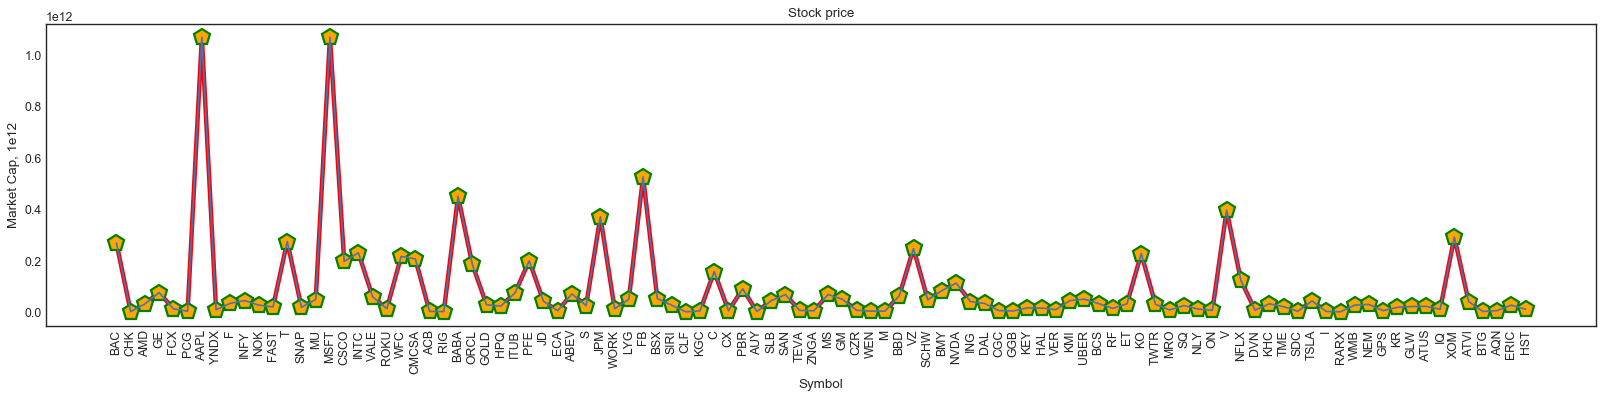

In [45]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 5), dpi=80, facecolor='w', edgecolor='k')

plt.plot(df2['Symbol'], df2['Market Cap_new'], '-p', color= 'red', markersize=15, linewidth=4, markerfacecolor='orange', markeredgecolor='green', markeredgewidth=2)
plt.xlabel('Symbol')
plt.xticks(rotation=90)
plt.ylabel('Market Cap, 1e12')
plt.title("Stock price") 
plt.plot(df2['Symbol'], df2['Market Cap_new'])

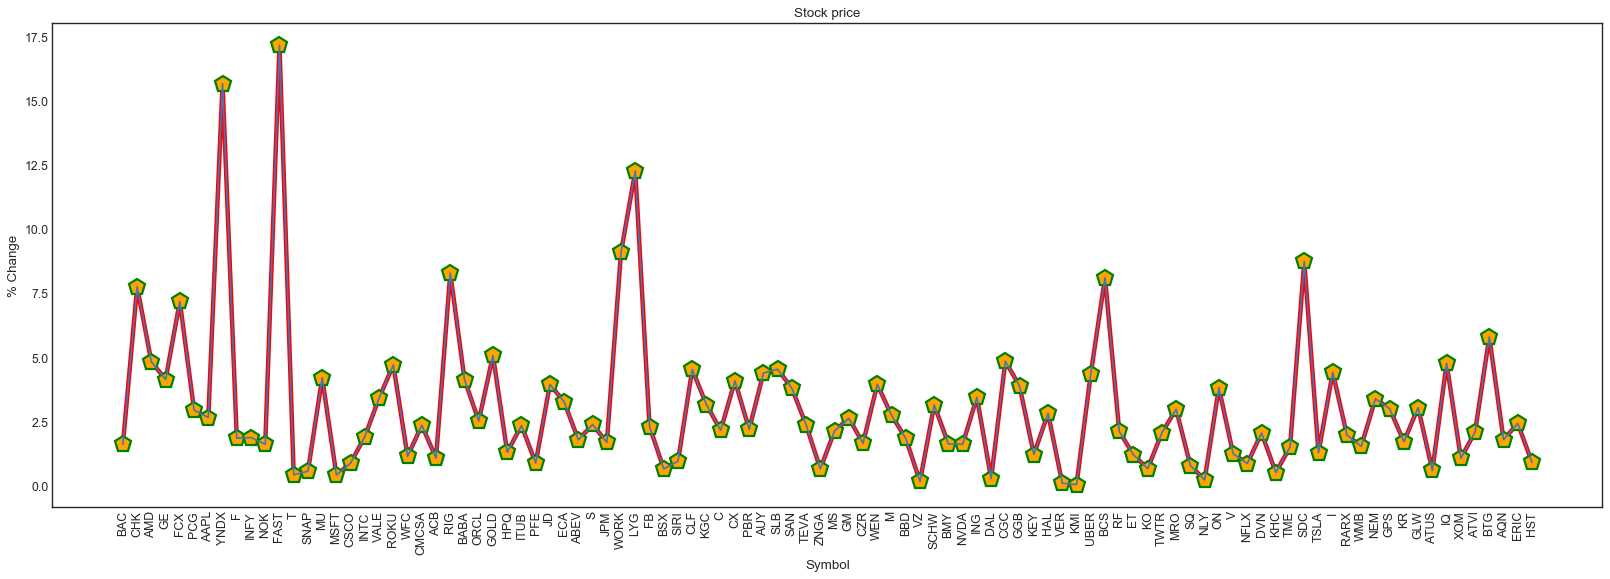

In [46]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 8), dpi=80, facecolor='w', edgecolor='k')
df2['% Change_new'] = pd.to_numeric(df2['% Change_new']) 

plt.plot(df2['Symbol'], df2['% Change_new'], '-p', color= 'red', markersize=15, linewidth=4, markerfacecolor='orange', markeredgecolor='green', markeredgewidth=2)
plt.xlabel('Symbol')
plt.xticks(rotation=90)
plt.ylabel('% Change')
plt.title("Stock price") 
plt.plot(df2['Symbol'], df2['% Change_new'])

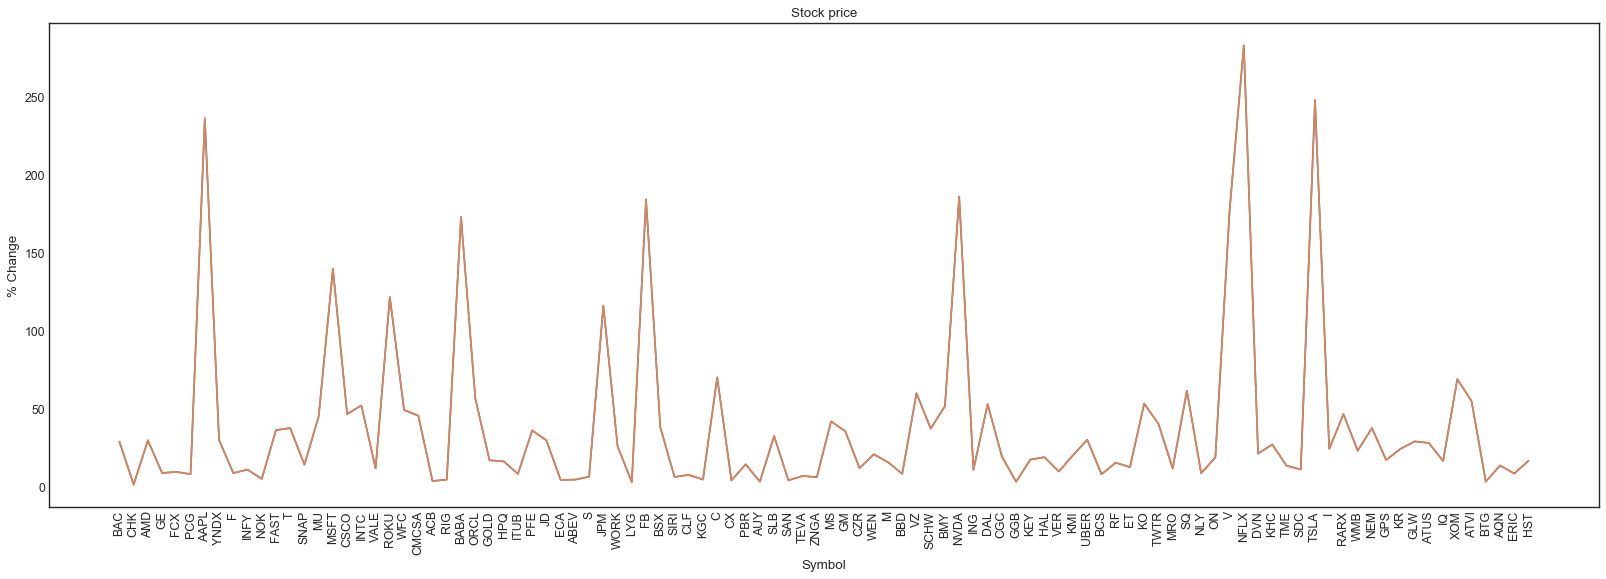

In [59]:
figure(num=None, figsize=(25, 8), dpi=80, facecolor='w', edgecolor='k')
df2['Price (Intraday)'] = pd.to_numeric(df2['Price (Intraday)']) 
plt.plot(df2['Symbol'], df2['Price (Intraday)'])
plt.xlabel('Symbol')
plt.xticks(rotation=90)
plt.ylabel('% Change')
plt.title("Stock price")
plt.plot(df2['Symbol'], df2['Price (Intraday)'])

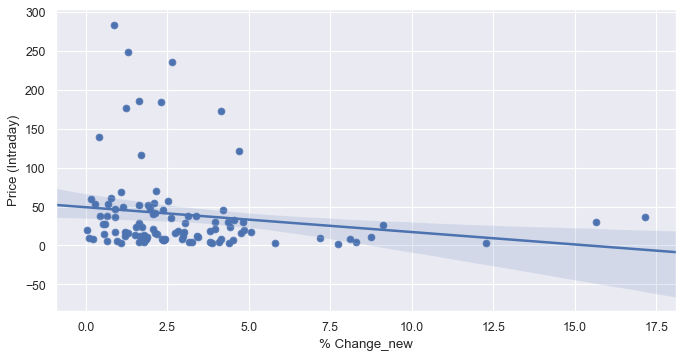

In [48]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="% Change_new", y="Price (Intraday)", data=df2)
sns.regplot(x="% Change_new", y="Price (Intraday)", data=df2)

In [49]:
from scipy import stats
stats.spearmanr(df2['% Change_new'], df2['Price (Intraday)'])

SpearmanrResult(correlation=-0.27919061971726183, pvalue=0.004908632252627996)

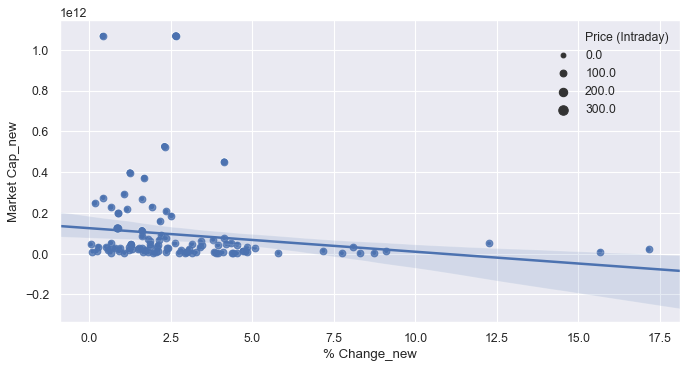

In [50]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="% Change_new", y='Market Cap_new',  size="Price (Intraday)", data=df2)
sns.regplot(x="% Change_new", y="Market Cap_new", data=df2)

In [51]:
from scipy import stats
stats.spearmanr(df2['% Change_new'], df2['Market Cap_new'])

SpearmanrResult(correlation=-0.3516626612355284, pvalue=0.0003335807414507306)

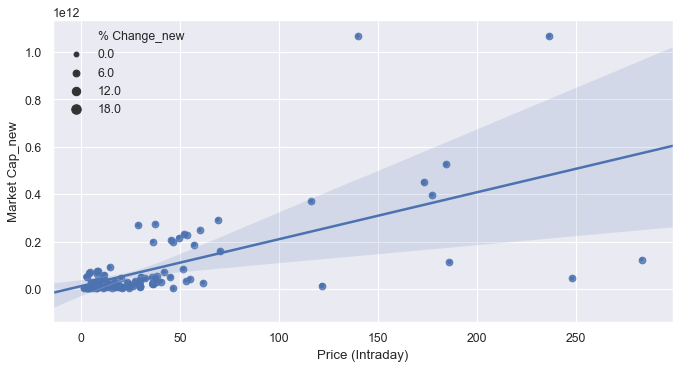

In [52]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x='Price (Intraday)', y='Market Cap_new', size="% Change_new", data=df2)
sns.regplot(x="Price (Intraday)", y="Market Cap_new", data=df2)

In [53]:
from scipy import stats
stats.spearmanr(df2['Price (Intraday)'], df2['Market Cap_new'])

SpearmanrResult(correlation=0.6033441444495935, pvalue=3.061657609742169e-11)

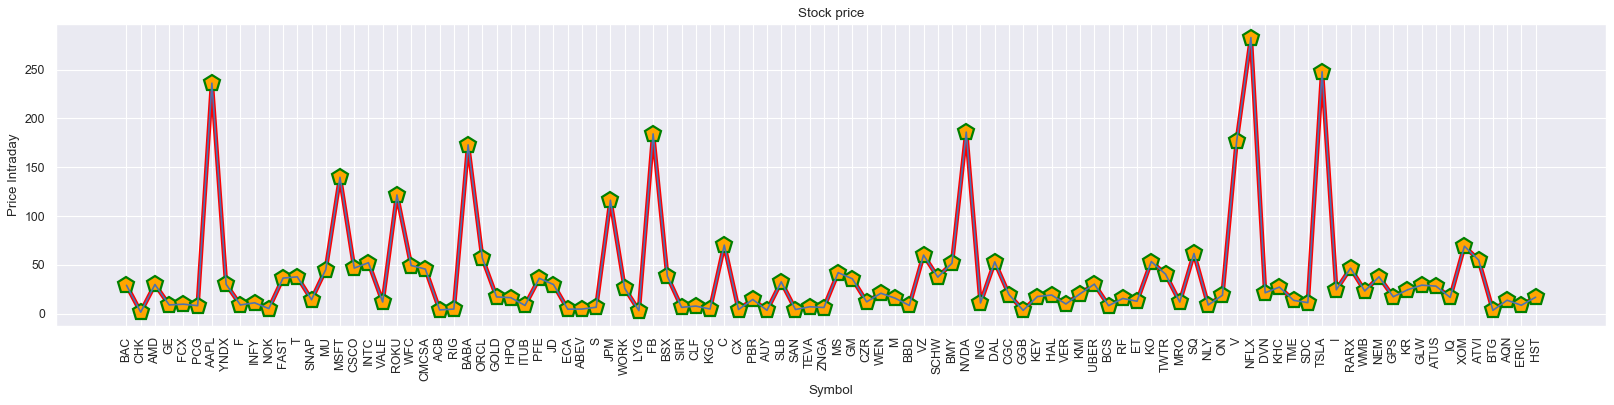

In [54]:
df2['Price (Intraday)'] = pd.to_numeric(df2['Price (Intraday)']) 
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df2['Symbol'], df2['Price (Intraday)'], '-p', color= 'red', markersize=15, linewidth=4, markerfacecolor='orange', markeredgecolor='green', markeredgewidth=2)
plt.xlabel('Symbol')
plt.xticks(rotation=90)
plt.ylabel('Price Intraday')
plt.title("Stock price") 
plt.plot(df2['Symbol'], df2['Price (Intraday)'])

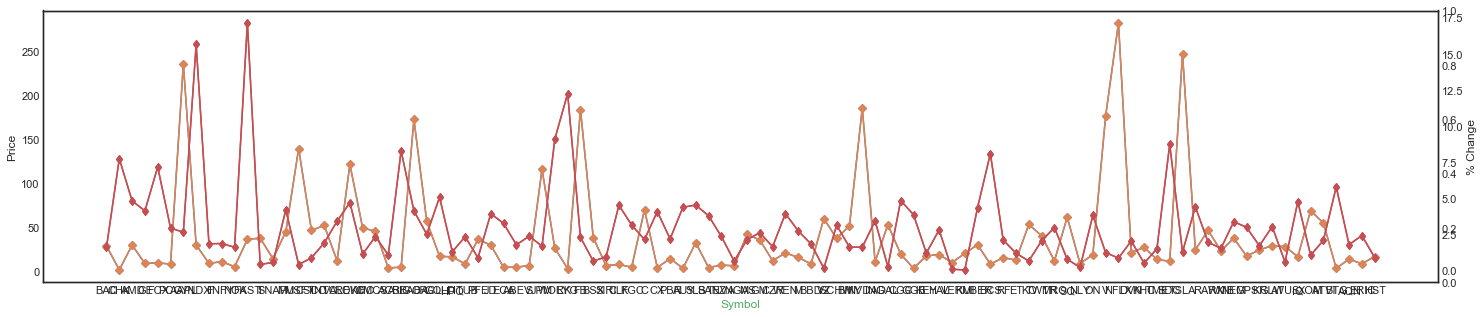

In [60]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 5

figure, host = plt.subplots()
#figure.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
p1, = host.plot(df2['Symbol'], df2['Price (Intraday)'], label= "Price", marker='D')
p2, = par1.plot(df2['Symbol'], df2['% Change_new'], "r-", label="% Change", marker='d')
host.set_xlabel('Symbol', color='g')
host.set_ylabel("Price")
par1.set_ylabel("% Change")
plt.xticks(rotation=90)
p1, = host.plot(df2['Symbol'], df2['Price (Intraday)'], label= "Price", marker='D')
p2, = par1.plot(df2['Symbol'], df2['% Change_new'], "r-", label="% Change", marker='d')

<BarContainer object of 100 artists>

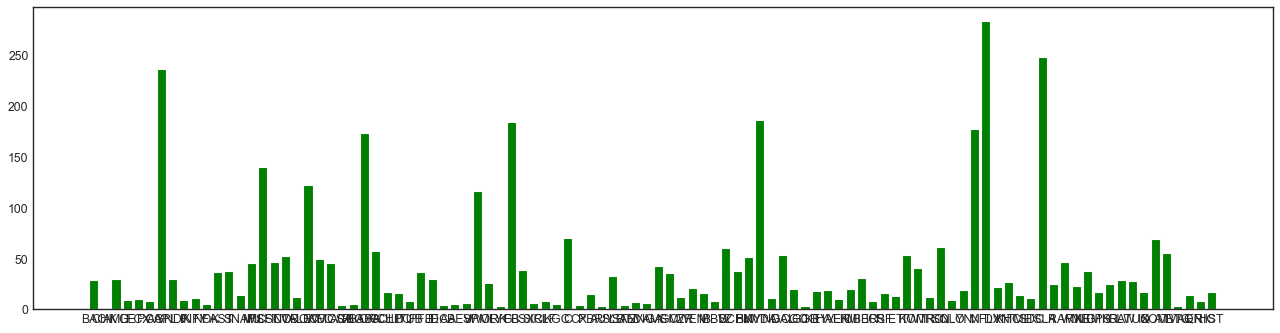

In [56]:
df2['Price (Intraday)'] = pd.to_numeric(df2['Price (Intraday)']) 

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 5), dpi=80, facecolor='w', edgecolor='k')
pd.to_numeric(df2['Price (Intraday)'])
plt.style.use('seaborn-white')
plt.bar(df2['Symbol'], df2['Price (Intraday)'], color='green')

Text(0, 0.5, '% Change_new')

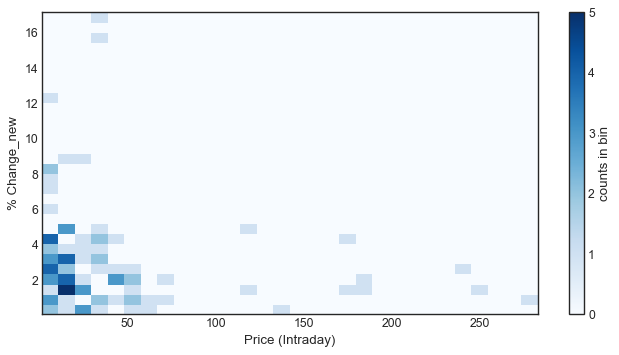

In [57]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.hist2d(df2['Price (Intraday)'], df2['% Change_new'], bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Price (Intraday)')
plt.ylabel('% Change_new')

Text(0, 0.5, '% Change_new')

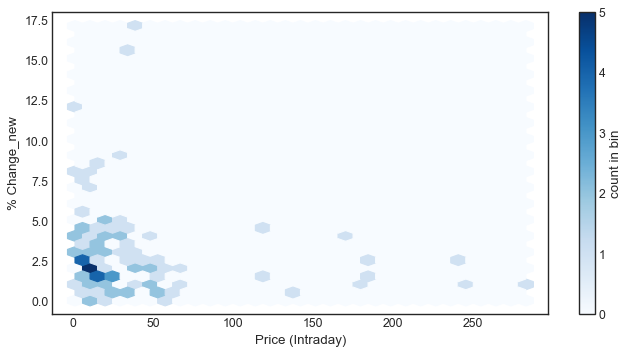

In [58]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.hexbin(df2['Price (Intraday)'], df2['% Change_new'], gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')
plt.xlabel('Price (Intraday)')
plt.ylabel('% Change_new')

In [30]:
from scipy import stats
stats.spearmanr(df2['% Change_new'], df2['Price (Intraday)'])

SpearmanrResult(correlation=-0.27919061971726183, pvalue=0.004908632252627996)